## Is F1 Driver of the Day correlated to ΔPosition? 

### Driver of the Day is a fan vote of which driver 'performed' with the most favor of the viewers. It started in 2016 and has continued into the 2021 season of Formula 1. Obviously, there are many different factors that could contribute to the fan vote-- personality, defense driving, unexpectedly good pole position and results, strategy, metarace news. But we'd like to see how many times the Delta Driver, that is the person who gains the most positions, is voted the Driver of the Day.

Original CSV of dotd results created from: https://f1.fandom.com/wiki/Driver_of_the_Day
Original F1 data from: https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020?select=results.csv 
### To analyze the data above, I'll be making several dataframes, and manipulating them to see what really causes Driver of the Day. Let's get to data wranglin'! Yee haw!

_____________________________

In [1]:
import pandas as pd

In [2]:
results      = pd.read_csv('csv_files/results.csv')
driverOTD    = pd.read_csv('csv_files/driverOTDResults.csv')

drivers      = pd.read_csv('csv_files/drivers.csv')
races        = pd.read_csv('csv_files/races.csv')
constructors = pd.read_csv('csv_files/constructors.csv')
status       = pd.read_csv('csv_files/status.csv')

results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25035,25041,1055,849,3,6,19,16,16,16,0.0,65,\N,\N,57,16,1:22.905,203.003,11
25036,25042,1055,4,214,14,10,17,17,17,0.0,65,\N,\N,63,6,1:21.182,207.311,11
25037,25043,1055,854,210,47,18,18,18,18,0.0,64,\N,\N,54,12,1:22.637,203.661,12
25038,25044,1055,853,210,9,20,19,19,19,0.0,64,\N,\N,45,19,1:24.040,200.261,12


Adding driver year, date, name, driver names, constructor names, conditions to results df

In [3]:
racing_data = results.drop(["positionText", "number", "laps", "milliseconds", 'fastestLap'], axis=1)
racing_data

,resultId,raceId,driverId,constructorId,grid,position,positionOrder,points,time,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,1,1,1,10.0,1:34:50.616,2,1:27.452,218.300,1
1,2,18,2,2,5,2,2,8.0,+5.478,3,1:27.739,217.586,1
2,3,18,3,3,7,3,3,6.0,+8.163,5,1:28.090,216.719,1
3,4,18,4,4,11,4,4,5.0,+17.181,7,1:28.603,215.464,1
4,5,18,5,1,3,5,5,4.0,+18.014,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25035,25041,1055,849,3,19,16,16,0.0,\N,16,1:22.905,203.003,11
25036,25042,1055,4,214,10,17,17,0.0,\N,6,1:21.182,207.311,11
25037,25043,1055,854,210,18,18,18,0.0,\N,12,1:22.637,203.661,12
25038,25044,1055,853,210,20,19,19,0.0,\N,19,1:24.040,200.261,12


In [4]:
racing_data['raceYear']     = results['raceId'].map(races.set_index('raceId')['year'])
racing_data['raceDate']     = results['raceId'].map(races.set_index('raceId')['date'])
racing_data['raceName']     = results['raceId'].map(races.set_index('raceId')['name'])
racing_data['driverRef']    = results['driverId'].map(drivers.set_index('driverId')['driverRef'])
racing_data['constructRef'] = results['constructorId'].map(constructors.set_index('constructorId')['constructorRef'])

racing_data['condition']    = results['statusId'].map(status.set_index('statusId')['status'])

Paring down data so that it's only from 2016 onwards:

In [5]:
racing_data16 = racing_data[(racing_data['raceId'] >= 948)]
racing_data1620 = racing_data16[(racing_data['raceId'] <= 1047)]

<ipython-input-5-d0675deb24f1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  racing_data1620 = racing_data16[(racing_data['raceId'] <= 1047)]


In [6]:
#Adding dotd data to races1620 data
races16   = races[(races['raceId'] >= 948)]
races1620 = races16[(races16['raceId'] <= 1047)]

races1620 = pd.merge(races1620, driverOTD)
races1620_sorted = races1620.sort_values(by=['raceId'], inplace=True)
races1620

,raceId,year,round,circuitId,name,date,time,url,raceYear,raceName,dotd
0,948,2016,1,1,Australian Grand Prix,2016-03-20,05:00:00,https://en.wikipedia.org/wiki/2016_Australian_...,2016,Australian Grand Prix,grosjean
1,949,2016,2,3,Bahrain Grand Prix,2016-04-03,15:00:00,https://en.wikipedia.org/wiki/2016_Bahrain_Gra...,2016,Bahrain Grand Prix,grosjean
2,950,2016,3,17,Chinese Grand Prix,2016-04-17,06:00:00,https://en.wikipedia.org/wiki/2016_Chinese_Gra...,2016,Chinese Grand Prix,kvyat
3,951,2016,4,71,Russian Grand Prix,2016-05-01,12:00:00,https://en.wikipedia.org/wiki/2016_Russian_Gra...,2016,Russian Grand Prix,kevin_magnussen
4,952,2016,5,4,Spanish Grand Prix,2016-05-15,12:00:00,https://en.wikipedia.org/wiki/2016_Spanish_Gra...,2016,Spanish Grand Prix,max_verstappen
...,...,...,...,...,...,...,...,...,...,...,...
95,1043,2020,13,21,Emilia Romagna Grand Prix,2020-11-01,12:10:00,https://en.wikipedia.org/wiki/2020_Emilia_Roma...,2020,Emilia-Romagna Grand Prix,raikkonen
96,1044,2020,14,5,Turkish Grand Prix,2020-11-15,10:10:00,https://en.wikipedia.org/wiki/2020_Turkish_Gra...,2020,Turkish Grand Prix,vettel
97,1045,2020,15,3,Bahrain Grand Prix,2020-11-29,14:10:00,https://en.wikipedia.org/wiki/2020_Bahrain_Gra...,2020,Bahrain Grand Prix,grosjean
98,1046,2020,16,3,Sakhir Grand Prix,2020-12-06,17:10:00,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...,2020,Sakhir Grand Prix,russell


Adding dotd data to racing_data1620 from dotd csv file. 

In [7]:
racing_data1620['dotd'] = results['raceId'].map(driverOTD.set_index('raceId')['dotd']);

<ipython-input-7-a6e2f03acdf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  racing_data1620['dotd'] = results['raceId'].map(driverOTD.set_index('raceId')['dotd']);


In [8]:
#spot checking
racing_data1620.groupby(['raceId', 'driverRef']).max()[:20]

resultId  driverId  constructorId  grid position  \
raceId driverRef                                                           
948    alonso              22937         4              1    11       \N   
       bottas              22924       822              3    16        8   
       button              22930        18              1    12       14   
       ericsson            22933       828             15    15       \N   
       grosjean            22922       154            210    19        6   
       gutierrez           22936       821            210    20       \N   
       hamilton            22918         1            131     1        2   
       haryanto            22935       837            209    22       \N   
       hulkenberg          22923       807             10    10        7   
       jolyon_palmer       22927       835              4    13       11   
       kevin_magnussen     22928       825              4    14       12   
       kvyat               22938       826              9    18       \N   
       massa               22921        13              3     6        5   
       max_verstappen      22926       830              5     5       10   
       nasr                22931       831             15    17       15   
       perez               22929       815             10     9       13   
       raikkonen           22934         8              6     4       \N   
       ricciardo           22920       817              9     8        4   
       rosberg             22917         3            131     2        1   
       sainz               22925       832              5     7        9   

                        positionOrder  points         time rank  \
raceId driverRef                                                  
948    alonso                      21     0.0           \N   11   
       bottas                       8     4.0    +1:15.153   14   
       button                      14     0.0           \N    8   
       ericsson                    17     0.0           \N   21   
       grosjean                     6     8.0    +1:12.081   17   
       gutierrez                   20     0.0           \N   19   
       hamilton                     2    18.0       +8.060    4   
       haryanto                    19     0.0           \N   20   
       hulkenberg                   7     6.0    +1:14.199   16   
       jolyon_palmer               11     0.0    +1:23.399   18   
       kevin_magnussen             12     0.0    +1:25.606   10   
       kvyat                       22     0.0           \N    0   
       massa                        5    10.0      +58.979    9   
       max_verstappen              10     1.0    +1:16.833    6   
       nasr                        15     0.0           \N   13   
       perez                       13     0.0    +1:31.699   15   
       raikkonen                   18     0.0           \N    5   
       ricciardo                    4    12.0      +24.330    1   
       rosberg                      1    25.0  1:48:15.565    3   
       sainz                        9     2.0    +1:15.680    7   

                       fastestLapTime fastestLapSpeed  statusId  raceYear  \
raceId driverRef                                                            
948    alonso                1:32.553         206.268         4      2016   
       bottas                1:32.725         205.886         1      2016   
       button                1:31.684         208.223        11      2016   
       ericsson              1:33.892         203.327         5      2016   
       grosjean              1:32.862         205.582         1      2016   
       gutierrez             1:32.998         205.281         4      2016   
       hamilton              1:30.646         210.608         1      2016   
       haryanto              1:33.847         203.424        26      2016   
       hulkenberg            1:32.833         205.646         1      2016   
       jolyon_palmer         

In [9]:
pd.to_numeric(racing_data1620['position'], errors = 'ignore')
pd.to_numeric(racing_data1620['grid'], errors = 'ignore');

In [10]:
def sub(a, b): 
    try: 
        return int(a) - int(b)
    except ValueError: 
        return None

racing_data1620['deltaPos']  = racing_data1620.apply(lambda f: sub(f['grid'],f['position']), axis=1)

<ipython-input-10-088c25335dfd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  racing_data1620['deltaPos']  = racing_data1620.apply(lambda f: sub(f['grid'],f['position']), axis=1)


## Now, the fun begins, let's see how many different deltaPos values we have

In [11]:
racing_data1620['deltaPos'].value_counts(ascending = True)[:10]

-20.0     1
-18.0     1
-11.0     1
 14.0     2
 18.0     2
 17.0     2
-15.0     2
-13.0     3
 13.0     3
-17.0     3
-16.0     4
 16.0     4
 15.0     4
 12.0     7
-8.0      8
-10.0     8
-9.0     11
 11.0    12
 10.0    13
Name: deltaPos, dtype: int64

#### Clearly, the most freqent deltaPos values are 0,1, and 2, which makes sense, as most drivers don't change their place too much during the race. 

#### Let's select the two races that have a +18 deltaPos, and see if our theory holds true. 

In [12]:
racing_data1620[(racing_data1620['deltaPos'] == 18)]

,resultId,raceId,driverId,constructorId,grid,position,positionOrder,points,time,rank,...,fastestLapSpeed,statusId,raceYear,raceDate,raceName,driverRef,constructRef,condition,dotd,deltaPos
23178,23183,960,1,131,21,3,3,15.0,+27.634,1,...,225.969,1,2016,2016-08-28,Belgian Grand Prix,hamilton,mercedes,Finished,hamilton,18.0
24401,24407,1020,20,6,20,2,2,18.0,+7.333,2,...,214.423,1,2019,2019-07-28,German Grand Prix,vettel,ferrari,Finished,max_verstappen,18.0


### Two races with interesting outcomes. At the 2016 Belgian Grand Prix, Lewis Hamilton began with a '60-place grid penalty' due to many changes to the design of his car. As such, he started in last place, but managed to race back into 3rd.


In [13]:
race960 = racing_data1620[(racing_data1620['raceId'] == 960)].drop(['resultId', 'rank', 'raceYear', 'raceDate', "raceName", 'statusId', 'driverId', 'raceId', 'constructorId', 'positionOrder', 'points'], axis=1)

a = race960.groupby(['driverRef', 'deltaPos']).max().sort_values(by='deltaPos', ascending = False)
a

,,grid,position,time,fastestLapTime,fastestLapSpeed,constructRef,condition,dotd
driverRef,deltaPos,,,,,,,,
hamilton,18.0,21,3,+27.634,1:51.583,225.969,mercedes,Finished,hamilton
alonso,15.0,22,7,+59.445,1:54.484,220.243,mclaren,Finished,hamilton
gutierrez,6.0,18,12,+1:13.877,1:54.335,220.530,haas,Finished,hamilton
kvyat,5.0,19,14,+1:27.097,1:52.081,224.965,toro_rosso,Finished,hamilton
hulkenberg,3.0,7,4,+35.907,1:53.530,222.094,force_india,Finished,hamilton
ricciardo,3.0,5,2,+14.113,1:52.461,224.205,red_bull,Finished,hamilton
ocon,1.0,17,16,\N,1:55.734,217.865,manor,+1 Lap,hamilton
perez,1.0,6,5,+40.660,1:53.414,222.321,force_india,Finished,hamilton
rosberg,0.0,1,1,1:44:51.058,1:51.746,225.640,mercedes,Finished,hamilton


### This is the full data of the race. Hamilton clearly has the highest deltaPos of the racers. He also has the fastest lap speed and time, which would be necessary for him to climb the results to that position. 
### But looking back at the two races that have 18 deltaPos: 


In [14]:
racing_data1620[(racing_data1620['deltaPos'] == 18)]

,resultId,raceId,driverId,constructorId,grid,position,positionOrder,points,time,rank,...,fastestLapSpeed,statusId,raceYear,raceDate,raceName,driverRef,constructRef,condition,dotd,deltaPos
23178,23183,960,1,131,21,3,3,15.0,+27.634,1,...,225.969,1,2016,2016-08-28,Belgian Grand Prix,hamilton,mercedes,Finished,hamilton,18.0
24401,24407,1020,20,6,20,2,2,18.0,+7.333,2,...,214.423,1,2019,2019-07-28,German Grand Prix,vettel,ferrari,Finished,max_verstappen,18.0


### We see that in the second race, Vettel climbed up 18 positions, but Verstappen was voted driver of the day. Looking at the F1 site's review of the race, https://www.formula1.com/en/racing/2019/Germany.html, we can see that Vettel was voted number 2 DotD. 

### The race was a wet/dry race, meaning the track had rain, but dried up as the race went on. Verstappen began in third, but after some mistakes from both Bottas and Hamilton, the second and first pole drivers, was able to win the race by driving clean and coming across the line first. 

### Already, we can see that there are many reasons for a Driver of the Day win, but these are just two examples. Let's do some more close observation. 

### So, how do we determine the correlation of DotD and deltaPos? Let's see how many times the DotD had the highest deltaPos. First, let's make a new column for the racer with the highest deltaPos, or the Delta Driver. 

In [15]:
#The amount of true times = how many races there were in these 4 seasons, and 70 given dotd results. 
# racing_data1620.value_counts(racing_data1620['dotd'] == racing_data1620['driverRef'])

##Removes non-finishers
maxRaceDelta = racing_data1620.groupby(['raceId']).max()

maxes = racing_data1620.groupby(['raceId'])['deltaPos'].transform(max) == racing_data1620['deltaPos']
maxDeltaPos_Race = racing_data1620[maxes].groupby('raceId').max()

maxRaceDelta['deltaDriver'] = maxDeltaPos_Race['driverRef']


dotdVsDeltaDriver = maxRaceDelta[['raceDate', 'raceYear','raceName', 'dotd', 'deltaDriver', 'deltaPos']]
dotdVsDeltaDriver

,raceDate,raceYear,raceName,dotd,deltaDriver,deltaPos
raceId,,,,,,
948,2016-03-20,2016,Australian Grand Prix,grosjean,grosjean,13.0
949,2016-04-03,2016,Bahrain Grand Prix,grosjean,kevin_magnussen,11.0
950,2016-04-17,2016,Chinese Grand Prix,kvyat,hamilton,15.0
951,2016-05-01,2016,Russian Grand Prix,kevin_magnussen,kevin_magnussen,10.0
952,2016-05-15,2016,Spanish Grand Prix,max_verstappen,massa,10.0
...,...,...,...,...,...,...
1043,2020-11-01,2020,Emilia Romagna Grand Prix,raikkonen,giovinazzi,10.0
1044,2020-11-15,2020,Turkish Grand Prix,vettel,sainz,10.0
1045,2020-11-29,2020,Bahrain Grand Prix,grosjean,sainz,10.0


### We now have a functional dataframe, which has a single row for each race, in which there are columns for the Delta Driver and Driver of the day! Now, let's count to see how many times the Delta Driver is also the Driver of the Day.

#### As a note, since deltaDriver may have more than one person, there are some added rows. 

In [16]:
dotdVsDeltaDriver.value_counts(dotdVsDeltaDriver['dotd'] == dotdVsDeltaDriver['deltaDriver'])

False    81
True     19
dtype: int64

## Well! Seems like the hypothesis is false. That less than a quarter of the time the Delta Driver is also the Driver of the Day does not mean that gaining lots of laps is not a contributing factor, but rather, it is not the most important factor. 

### Maybe we can quickly check to see whether the Driver of the Day is more determined by who won the race? 

In [17]:
raceWinners = racing_data1620.groupby(['raceId', 'position', 'driverRef']).max()

firsts = racing_data1620.groupby(['raceId'])['position'].transform(min) == racing_data1620['position']
raceWinner = racing_data1620[firsts].groupby('raceId').min()

dotdVsDeltaDriver['winningDriver'] = raceWinner['driverRef']
dotdVsDeltaDriver

<ipython-input-17-e48ae2e04013>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dotdVsDeltaDriver['winningDriver'] = raceWinner['driverRef']


,raceDate,raceYear,raceName,dotd,deltaDriver,deltaPos,winningDriver
raceId,,,,,,,
948,2016-03-20,2016,Australian Grand Prix,grosjean,grosjean,13.0,rosberg
949,2016-04-03,2016,Bahrain Grand Prix,grosjean,kevin_magnussen,11.0,rosberg
950,2016-04-17,2016,Chinese Grand Prix,kvyat,hamilton,15.0,rosberg
951,2016-05-01,2016,Russian Grand Prix,kevin_magnussen,kevin_magnussen,10.0,rosberg
952,2016-05-15,2016,Spanish Grand Prix,max_verstappen,massa,10.0,max_verstappen
...,...,...,...,...,...,...,...
1043,2020-11-01,2020,Emilia Romagna Grand Prix,raikkonen,giovinazzi,10.0,hamilton
1044,2020-11-15,2020,Turkish Grand Prix,vettel,sainz,10.0,hamilton
1045,2020-11-29,2020,Bahrain Grand Prix,grosjean,sainz,10.0,hamilton


In [18]:
dotdVsDeltaDriver.value_counts(dotdVsDeltaDriver['dotd'] == dotdVsDeltaDriver['winningDriver'])

False    71
True     29
dtype: int64

### The winner of the race is definitely more correlated to the Driver of the Day than is the title of Delta Driver. But as noted in the intro, Driver of the Day can also be determined by popularity of the driver themselves, and not by skill of the driver. So to observe this, let's see who is voted Driver of the Day the most. 

In [19]:
dotdVsDeltaDriver.value_counts('dotd').to_frame()

,0
dotd,
max_verstappen,28
vettel,18
hamilton,8
ricciardo,8
leclerc,5
bottas,5
perez,4
raikkonen,4
grosjean,3


### Despite being a 7 time world champion, and holding the record for most wins, poles, and podiums, Lewis Hamilton is only third in the standings, tied with no-time world champ Daniel Ricciardo. Verstappen, a zero-time(edit: as of 2021, now one-time) world champion, is at the top. This may be due to the timeframe of the data collection. As was previously stated, the Driver of the Day voting system began in 2016, which was Verstappen's second season, and the season of his first win with Red Bull Racing. By this time, Hamilton had been in F1 for 9 years. 

### Perhaps the Driver of the Day, to a degree, does not reflect performance, but rather reflects the fans' notions of the performance of the Driver. Verstappen is an up-and-coming racer, and perhaps his success in Driver of the Day reflects the fan excitement. Let's plot how many times he's won DotD by year, and see if this helps us answer our questions. 

In [20]:
dotdVsDeltaDriver.groupby('raceYear').size()

dotdsByYear = dotdVsDeltaDriver.groupby(['raceYear', 'dotd']).size().reset_index(name='dotdCount')


dby = dotdsByYear[dotdsByYear['dotdCount'] >= 1].groupby(['raceYear', 'dotd']).max()
dby


dotdCount
raceYear dotd                      
2016     grosjean                 2
         hamilton                 1
         kevin_magnussen          1
         kvyat                    1
         max_verstappen           8
         perez                    2
         raikkonen                1
         ricciardo                1
         rosberg                  1
         vettel                   3
2017     bottas                   3
         hamilton                 3
         max_verstappen           3
         raikkonen                1
         ricciardo                2
         stroll                   1
         vettel                   7
2018     alonso                   2
         gasly                    1
         hamilton                 3
         leclerc                  1
         max_verstappen           6
         raikkonen                1
         ricciardo                4
         vettel                   3
2019     albon                    2
         bottas                   2
         hulkenberg               1
         leclerc                  4
         max_verstappen           7
         norris                   2
         vettel                   3
2020     albon                    1
         gasly                    2
         grosjean                 1
         hamilton                 1
         hulkenberg               1
         max_verstappen           4
         perez                    2
         raikkonen                1
         ricciardo                1
         russell                  1
         vettel                   2

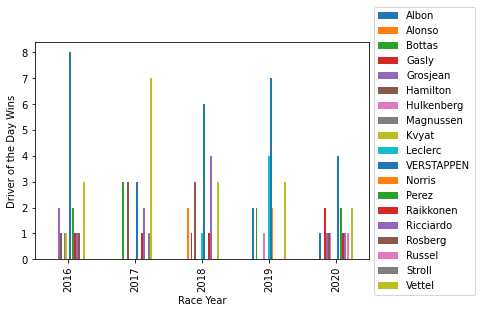

In [21]:
import matplotlib.pyplot as plt
dby.unstack(fill_value = 0).plot.bar();

plt.ylabel('Driver of the Day Wins')
plt.xlabel('Race Year')
plt.legend(['Albon','Alonso', 'Bottas', 'Gasly', 'Grosjean', 'Hamilton', 'Hulkenberg', 'Magnussen', 'Kvyat', "Leclerc", "VERSTAPPEN", "Norris", "Perez", 'Raikkonen', "Ricciardo", "Rosberg", "Russel", "Stroll", "Vettel"],loc='center left', bbox_to_anchor=(1, 0.5));


### In all but 2017, Verstappen seems to have been the favorite. This is especially evident in 2019, when Hamilton scored no Driver of the Day wins, but won the championship. So far, this data might show a downward trend for Verstappen, currently, in the 2021 season, he has no DotDs, but his teammate Sergio Perez has 2. Maybe something similar is happening to Verstappen as did to Hamilton. 

### Maybe when a person wins for so long, calling them the Driver of the Day isn't as exciting as rewarding a driver who worked hard, but maybe didn't win. People love upsets and young drivers hoping to prove themselves, and for the past five years, that driver has been Max Verstappen. 

__________

### So! It seems like the Driver of the Day is not strongly correlated to the Delta Driver, it's somewhat correlated to race winner, but overall, it seems like people just really like Max Verstappen. As of now, he's something of a fan-favorite, and seems like he will be remaining as such for a while. It's worth re-mentioning that Driver of the Day began in 2016, when, personally I would argue, Lewis Hamilton began to lose his favor with the audience. 2016 marked the year Nico Rosberg, Hamilton's teammate at Mercedes, beat him for WDC and breaking a 2-year win streak. After that, Hamilton has won every championship since (edit: in 2021, his streak was broken again), and for this reason, the fans are rooting for a dark horse. The same is true of sentiment regarding Vettel throughout his career. Just before he was winning, and during the first couple WDC's, he was the golden child of Red Bull, but as he dominated the track, people got bored, and turned their favor to Hamilton, before souring on him as well. If I were to make a prediction, I would say Verstappen's career will go the same way. He's in the public's good graces for now, and for, perhaps, his first three WDCs, but I'll say by 2025, we're going to have a new Driver of the Day Favorite. 
Thank you so much for reading through my analysis, and if you have any thoughts or questions, don't hesitate to reach out to my email, bridgetegan55@gmail.com